## [Exp-01]Sklearn Classifiers with toy datasets

### 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

#### (1) 필요한 모듈 import 하기

- 우선 sklearn 라이브러리 버전을 확인하고 진행.
- <span style = "color: #0000FF">sklearn dataset로 부터 digits data를 가져온다.</span>
- <span style = "color: #0000FF">train data와 test data를 나눠주는 train_test_split 함수를 가져온다.</span>
- <span style = "color: #0000FF">분류 보고서를 작성해주는 classification_report를 가져온다.</span>
- 오차행렬을 출력해주는 confusion_matrix를 가져온다.
- 다른 지표를 바로 가져오기 위해 metrics 전체를 가져온다.
- numpy, pandas, matplotlib

In [1]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(sklearn.__version__)

1.1.1


#### (2) 데이터 준비

- <span style = "color: #0000FF">load_digits()을 사용해 digit 데이터를 digits 란 이름 변수에 넣는다.</span>
- digits 변수가 어떤 변수와 메서드를 가지고 있는지 나열
- digits의 정보

In [2]:
digits = load_digits()
print(dir(digits))
print(digits.keys())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


#### (3) 데이터 이해하기

- <span style = "color: #0000FF">Feature Data 지정하기</span>
  - digits의 data(feature)를 digits_data에 넣기
  - digits_data의 형태 : 1797행, 64열
  - 8 * 8 이미지 픽셀 1797개 입니다. 
- <span style = "color: #0000FF">Label(target) Data 지정하기</span>
  - digits의 label을 digits_label에 넣기
  - DataFrame에 feature data 넣기
  - target을 통해 Dataframe에 label column 생성
- <span style = "color: #0000FF">Target Names 출력해 보기</span>
  - 0 ~ 9 : 글자들이 해당 숫자들 중 하나입니다.
- <span style = "color: #0000FF">데이터 Describe 해 보기</span>

In [3]:
# print(digits.feature_names)
digits_data = digits.data
print(digits_data.shape)
print(digits_data[0])
digits_label = digits.target
digits_df = pd.DataFrame(data = digits_data, columns=digits.feature_names)
# print(digits_df)
digits_df["label"] = digits_label
# print(digits_df)
print(digits.target_names)

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
# digits Describe 해보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### (4) train, test 데이터 분리

- digits_data와 digits_label을 가지고 분리
- 25%를 test 데이터로 사용

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.25, random_state=42)

#### (5) 다양한 모델로 학습시켜보기

- <span style = "color: #0000FF">Decision Tree 사용해 보기</span>
- <span style = "color: #0000FF">Random Forest 사용해 보기</span>
- <span style = "color: #0000FF">SVM 사용해 보기</span>
- <span style = "color: #0000FF">SGD Classifier 사용해 보기</span>
- <span style = "color: #0000FF">Logistic Regression 사용해 보기</span>

학습시키기 전에 앞서 추후 분석을 용이하게 하기 위해 Estimator 별로 데이터를 가지는 DataFrame을 만들겠습니다.

In [6]:
myArr = np.zeros((5,7)) # 0으로된 배열로 초기화
# myArr2 = np.zeros((5,4)) 

# put values in list (precision, recall, f1score, accuracy)
estimatorName = ['decision_tree', 'random_forest', 'SVM', 'SGD', 'logistic_regression'] # 5개 - row
metricsName = ['precision_weighted','precision_macro','recall_weighted','recall_macro','f1_score_weighted','f1_score_macro','accuracy'] # 7개 - col
# 지표별 비교를 위해 사용할 name list
# col_name : 그래프의 x축 표시용, col_name2 : weighted 와 macro에 추가되는 열, col_weighted, macro : 각각 df에 처음 들어가는 열
col_name = ['Precision', 'Recall', 'F1-score', 'Accuracy']
col_name2 = ["max", "max_value", "min", "min_value", "mean"]
col_macro = ['precision_macro', 'recall_macro', 'f1_score_macro', 'accuracy']
col_weighted = ['precision_weighted', 'recall_weighted', 'f1_score_weighted', 'accuracy']

df_digits = pd.DataFrame(myArr, columns = metricsName, index = estimatorName)
# df_digits_weighted = pd.DataFrame(myArr2, columns = col_weighted, index = estimatorName)
# df_digits_macro= pd.DataFrame(myArr2, columns = col_macro, index = estimatorName)

# weighted 와 macro df를 만듭니다.(기존 df의 'weighted 지표값과 accuracy', 'macro 지표값과 accuracy'를 가져와서 만듭니다. )
df_digits_weighted = df_digits.loc[ :, [ ('weighted' in i or i == 'accuracy') for i in df_digits.columns]].copy()
df_digits_macro = df_digits.loc[ :, [ ('macro' in i or i == 'accuracy') for i in df_digits.columns]].copy()

df_digits_weighted.loc[:,col_name2] = [0, 0, 0, 0, 0]
df_digits_macro.loc[:,col_name2] = [0, 0, 0, 0, 0]

##### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred))

E_NAME = 'decision_tree'

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.79      0.92      0.85        37
           2       0.94      0.79      0.86        38
           3       0.76      0.83      0.79        46
           4       0.93      0.93      0.93        55
           5       0.92      0.78      0.84        59
           6       0.90      0.98      0.94        45
           7       0.85      0.95      0.90        41
           8       0.76      0.66      0.70        38
           9       0.84      0.88      0.86        48

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



Decision_tree 를 사용하여 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.  
전체에 대한 precision, recall, f1-score 값을 나타낼 수 있는 각각의 macro avg와 weighted avg 또한 나왔습니다.  
weighted avg는 각 라벨의 샘플 개수인 supprot에 따라 비율을 적용한 것 이고 macro avg는 개수를 고려하지 않은 것 입니다.

In [8]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_digits.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_digits_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_digits_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_digits 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_digits.loc[E_NAME, col_weighted].mean()
w_max = df_digits.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_digits.loc[E_NAME, col_weighted].max()
w_min = df_digits.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_digits.loc[E_NAME, col_weighted].min()
df_digits_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_digits.loc[E_NAME, col_macro].mean() 
m_max = df_digits.loc[E_NAME, col_macro].idxmax()
m_max_value = df_digits.loc[E_NAME, col_macro].max()
m_min = df_digits.loc[E_NAME, col_macro].idxmin()
m_min_value = df_digits.loc[E_NAME, col_macro].min()
df_digits_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

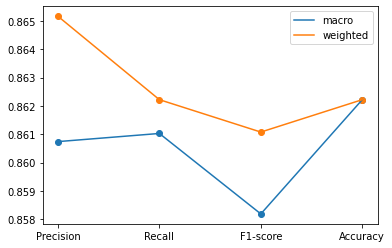

weighted 지표들 중 최댓값 :   precision_weighted = 0.86517      최솟값 :    f1_score_weighted = 0.86108      평균 : 0.86267 입니다.
   macro 지표들 중 최댓값 :             accuracy = 0.86222      최솟값 :       f1_score_macro = 0.85819      평균 : 0.86054 입니다.


In [9]:
plt.plot(col_name, df_digits_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_digits_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_digits_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_digits_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_digits_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_digits_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [10]:
if (df_digits.loc[E_NAME, 'precision_weighted'] > df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] > df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] > df_digits.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_digits.loc[E_NAME, 'precision_weighted'] < df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] < df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] < df_digits.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_digits_weighted.loc[E_NAME, 'mean'] > df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_digits_weighted.loc[E_NAME, 'mean'] < df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

weighted 지표들의 값이 macro 지표들 값보다 높습니다.


##### Random Forest


In [11]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'random_forest'

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        41
           8       0.95      0.97      0.96        38
           9       1.00      0.96      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Random Forest 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [12]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_digits.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_digits_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_digits_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_digits 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_digits.loc[E_NAME, col_weighted].mean()
w_max = df_digits.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_digits.loc[E_NAME, col_weighted].max()
w_min = df_digits.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_digits.loc[E_NAME, col_weighted].min()
df_digits_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_digits.loc[E_NAME, col_macro].mean() 
m_max = df_digits.loc[E_NAME, col_macro].idxmax()
m_max_value = df_digits.loc[E_NAME, col_macro].max()
m_min = df_digits.loc[E_NAME, col_macro].idxmin()
m_min_value = df_digits.loc[E_NAME, col_macro].min()
df_digits_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

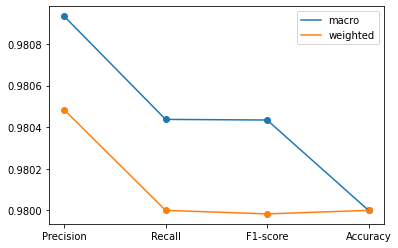

weighted 지표들 중 최댓값 :   precision_weighted = 0.98048      최솟값 :    f1_score_weighted = 0.97998      평균 : 0.98012 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.98093      최솟값 :             accuracy = 0.98      평균 : 0.98045 입니다.


In [13]:
plt.plot(col_name, df_digits_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_digits_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_digits_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_digits_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_digits_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_digits_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [14]:
if (df_digits.loc[E_NAME, 'precision_weighted'] > df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] > df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] > df_digits.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_digits.loc[E_NAME, 'precision_weighted'] < df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] < df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] < df_digits.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_digits_weighted.loc[E_NAME, 'mean'] > df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_digits_weighted.loc[E_NAME, 'mean'] < df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

macro 지표들의 값이 weighted 지표들 값보다 높습니다.


##### Support Vector Machine (SVM)


In [15]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SVM'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        38
           9       0.96      0.96      0.96        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



SVM 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [16]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_digits.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_digits_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_digits_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_digits 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_digits.loc[E_NAME, col_weighted].mean()
w_max = df_digits.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_digits.loc[E_NAME, col_weighted].max()
w_min = df_digits.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_digits.loc[E_NAME, col_weighted].min()
df_digits_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_digits.loc[E_NAME, col_macro].mean() 
m_max = df_digits.loc[E_NAME, col_macro].idxmax()
m_max_value = df_digits.loc[E_NAME, col_macro].max()
m_min = df_digits.loc[E_NAME, col_macro].idxmin()
m_min_value = df_digits.loc[E_NAME, col_macro].min()
df_digits_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

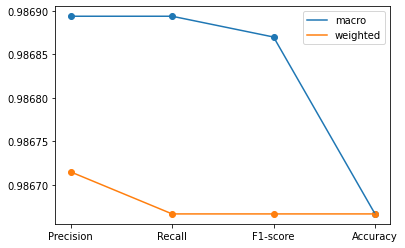

weighted 지표들 중 최댓값 :   precision_weighted = 0.98671      최솟값 :      recall_weighted = 0.98667      평균 : 0.98668 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.98689      최솟값 :             accuracy = 0.98667      평균 : 0.98683 입니다.


In [17]:
plt.plot(col_name, df_digits_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_digits_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_digits_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_digits_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_digits_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_digits_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [18]:
if (df_digits.loc[E_NAME, 'precision_weighted'] > df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] > df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] > df_digits.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_digits.loc[E_NAME, 'precision_weighted'] < df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] < df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] < df_digits.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_digits_weighted.loc[E_NAME, 'mean'] > df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_digits_weighted.loc[E_NAME, 'mean'] < df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

macro 지표들의 값이 weighted 지표들 값보다 높습니다.


##### SGD Classifier


In [19]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SGD'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.82      1.00      0.90        37
           2       0.97      1.00      0.99        38
           3       1.00      0.93      0.97        46
           4       1.00      0.96      0.98        55
           5       0.95      0.93      0.94        59
           6       0.94      0.98      0.96        45
           7       1.00      0.98      0.99        41
           8       0.89      0.82      0.85        38
           9       0.94      0.92      0.93        48

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



SGD 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [20]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_digits.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_digits_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_digits_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_digits 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_digits.loc[E_NAME, col_weighted].mean()
w_max = df_digits.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_digits.loc[E_NAME, col_weighted].max()
w_min = df_digits.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_digits.loc[E_NAME, col_weighted].min()
df_digits_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_digits.loc[E_NAME, col_macro].mean() 
m_max = df_digits.loc[E_NAME, col_macro].idxmax()
m_max_value = df_digits.loc[E_NAME, col_macro].max()
m_min = df_digits.loc[E_NAME, col_macro].idxmin()
m_min_value = df_digits.loc[E_NAME, col_macro].min()
df_digits_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

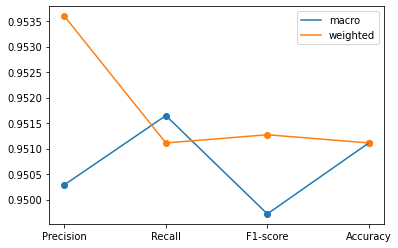

weighted 지표들 중 최댓값 :   precision_weighted = 0.95359      최솟값 :      recall_weighted = 0.95111      평균 : 0.95177 입니다.
   macro 지표들 중 최댓값 :         recall_macro = 0.95165      최솟값 :       f1_score_macro = 0.94972      평균 : 0.95069 입니다.


In [21]:
plt.plot(col_name, df_digits_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_digits_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_digits_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_digits_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_digits_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_digits_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [22]:
if (df_digits.loc[E_NAME, 'precision_weighted'] > df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] > df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] > df_digits.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_digits.loc[E_NAME, 'precision_weighted'] < df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] < df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] < df_digits.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_digits_weighted.loc[E_NAME, 'mean'] > df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_digits_weighted.loc[E_NAME, 'mean'] < df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### Logistic Regression


In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 10**4)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'logistic_regression'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.97      0.96        37
           2       0.97      1.00      0.99        38
           3       0.98      0.96      0.97        46
           4       1.00      0.96      0.98        55
           5       0.93      0.97      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.98      0.96      0.97        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Logistic Regression 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [24]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_digits.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_digits_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_digits_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_digits 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_digits.loc[E_NAME, col_weighted].mean()
w_max = df_digits.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_digits.loc[E_NAME, col_weighted].max()
w_min = df_digits.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_digits.loc[E_NAME, col_weighted].min()
df_digits_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_digits.loc[E_NAME, col_macro].mean() 
m_max = df_digits.loc[E_NAME, col_macro].idxmax()
m_max_value = df_digits.loc[E_NAME, col_macro].max()
m_min = df_digits.loc[E_NAME, col_macro].idxmin()
m_min_value = df_digits.loc[E_NAME, col_macro].min()
df_digits_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

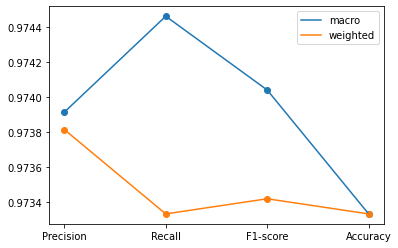

weighted 지표들 중 최댓값 :   precision_weighted = 0.97382      최솟값 :      recall_weighted = 0.97333      평균 : 0.97348 입니다.
   macro 지표들 중 최댓값 :         recall_macro = 0.97446      최솟값 :             accuracy = 0.97333      평균 : 0.97394 입니다.


In [25]:
plt.plot(col_name, df_digits_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_digits_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_digits_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_digits_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_digits_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_digits_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_digits_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_digits_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_digits_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_digits_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [26]:
if (df_digits.loc[E_NAME, 'precision_weighted'] > df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] > df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] > df_digits.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_digits.loc[E_NAME, 'precision_weighted'] < df_digits.loc[E_NAME, 'precision_macro']) \
    and (df_digits.loc[E_NAME, 'recall_weighted'] < df_digits.loc[E_NAME, 'recall_macro'])\
    and (df_digits.loc[E_NAME, 'f1_score_weighted'] < df_digits.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_digits_weighted.loc[E_NAME, 'mean'] > df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_digits_weighted.loc[E_NAME, 'mean'] < df_digits_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

macro 지표들의 값이 weighted 지표들 값보다 높습니다.


#### (6) 모델들의 성능 평가

여기까지 5개의 모델들을 digit data로 실험해보았습니다.  
모델들이 가지는 지표값들이 포함되어있는 데이터 프레임들을 나타내보겠습니다.

In [27]:
df_digits

,precision_weighted,precision_macro,recall_weighted,recall_macro,f1_score_weighted,f1_score_macro,accuracy
decision_tree,0.865170,0.860740,0.862222,0.861028,0.861077,0.858186,0.862222
random_forest,0.980484,0.980933,0.980000,0.980437,0.979983,0.980434,0.980000
SVM,0.986715,0.986894,0.986667,0.986894,0.986667,0.986870,0.986667
SGD,0.953594,0.950291,0.951111,0.951647,0.951272,0.949720,0.951111
logistic_regression,0.973816,0.973915,0.973333,0.974464,0.973420,0.974042,0.973333


In [28]:
df_digits_weighted

,precision_weighted,recall_weighted,f1_score_weighted,accuracy,max,max_value,min,min_value,mean
decision_tree,0.865170,0.862222,0.861077,0.862222,precision_weighted,0.865170,f1_score_weighted,0.861077,0.862673
random_forest,0.980484,0.980000,0.979983,0.980000,precision_weighted,0.980484,f1_score_weighted,0.979983,0.980117
SVM,0.986715,0.986667,0.986667,0.986667,precision_weighted,0.986715,recall_weighted,0.986667,0.986679
SGD,0.953594,0.951111,0.951272,0.951111,precision_weighted,0.953594,recall_weighted,0.951111,0.951772
logistic_regression,0.973816,0.973333,0.973420,0.973333,precision_weighted,0.973816,recall_weighted,0.973333,0.973476


In [29]:
df_digits_macro

,precision_macro,recall_macro,f1_score_macro,accuracy,max,max_value,min,min_value,mean
decision_tree,0.860740,0.861028,0.858186,0.862222,accuracy,0.862222,f1_score_macro,0.858186,0.860544
random_forest,0.980933,0.980437,0.980434,0.980000,precision_macro,0.980933,accuracy,0.980000,0.980451
SVM,0.986894,0.986894,0.986870,0.986667,precision_macro,0.986894,accuracy,0.986667,0.986831
SGD,0.950291,0.951647,0.949720,0.951111,recall_macro,0.951647,f1_score_macro,0.949720,0.950692
logistic_regression,0.973915,0.974464,0.974042,0.973333,recall_macro,0.974464,accuracy,0.973333,0.973939


* 가장 성능이 좋은 모델을 찾아봅시다.  
먼저 위의 DF만 보고는 어떤 지표를 가지고 비교할지 잘 모르겠으니 각 지표별로 최대값을 가지는 모델들을 출력해봅시다.

In [30]:
print(df_digits.idxmax())

precision_weighted    SVM
precision_macro       SVM
recall_weighted       SVM
recall_macro          SVM
f1_score_weighted     SVM
f1_score_macro        SVM
accuracy              SVM
dtype: object


모든 지표에서 SVM 모델이 가장 높은 값을 가집니다. 이렇게 보면 어떤 지표를 선택하더라도 SVM이 가장 높은 값을 가지므로  
digits classification에서는 5개의 모델 중 SVM 모델이 성능이 가장 좋은 것으로 나옵니다.

가장 중요한 지표를 정하기 앞서 각 지표가 무엇을 나타내는지 부터 알아봅시다.  

* accuracy : 올바르게 예측된 데이터 수를 전체 데이터 수로 나눈 값 입니다.
* precision : 모델이 True라고 했는데 실제 값이 True인 것을 살펴보는 지표입니다.
* recall : 실제 True 값들이 들어왔을때 모델이 얼마나 True라고 잘 예측하느냐를 살펴보는 지표입니다.
* f1_score : precision 과 recall의 조화평균  
    (조화평균을 쓰는 이유는 precision 또는 recall 값이 0에 가까워 질때 f1_score도 같이 작아지기 위해서 입니다.)  

 * precision_weighted : 각 class 별로 precision 값을 구한 뒤 support(number of sample) 비율을 다시 적용합니다.
 * precision_macro : 각 class 별로 precision 값을 구한 뒤 평균을 구합니다.
 * recall_weighted : 각 class 별로 recall 값을 구한 뒤 support(number of sample) 비율을 다시 적용합니다.
 * recall_macro : 각 class 별로 recall 값을 구한 뒤 평균을 구합니다.
 * f1_score_weighted : 각 class 별로 f1_score 값을 구한 뒤 support(number of sample) 비율을 다시 적용합니다.
 * f1_score_macro : 각 class 별로 f1_score 값을 구한 뒤 support(number of sample) 비율을 다시 적용합니다.

* 그럼 해당 데이터에서 모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
  
제 생각에는 샘플 당 개수를 고려해주는 weighted 지표들이 macro 지표들 보다 더 의미있다고 봅니다.  
데이터가 한 클래스에 치우쳐져있는 특정한 상황이라면 macro 값이 모델 성능 지표을 제대로 나타내지 않을 수도 있기 때문입니다.  
또한 해당 데이터의 support 값이 서로 다르기 때문입니다.(class 마다 다른 개수를 가짐)  
그리고 accuray 또한 unbalanced 데이터에서 모델 성능을 잘 평가하지 못할 수 있습니다.  
그래서 precision_weighted, recall_weighted, f1_score_weighted 중에서 고르겠습니다.  
  
이제 데이터의 용도 및 내용을 고려하는데, 우리는 손 글씨 이미지 데이터를 사용하였습니다.  
손글씨 데이터는 딱히 precision 이나 recall 중에 무엇이 더 중요하다고(낮을 시 큰 오류 발생 가능) 생각되지않으므로  
둘의 조화평균인 f1_score_weighted를 해당 데이터에 가장 중요한 지표라고 봅니다.

### 프로젝트 (2) load_wine : 와인을 분류해 봅시다

#### (1) 필요한 모듈 import 하기

- <span style = "color: #0000FF">sklearn dataset로 부터 wine data를 가져온다.</span>
- <span style = "color: #0000FF">train data와 test data를 나눠주는 train_test_split 함수를 가져온다.</span>
- <span style = "color: #0000FF">분류 보고서를 작성해주는 classification_report를 가져온다.</span>

In [31]:
from sklearn.datasets import load_wine
# 나머지 모듈은 프로젝트 1에서 이미 import 하였습니다.

#### (2) 데이터 준비

- <span style = "color: #0000FF">load_wine()을 사용해 와인 데이터를 wine 변수에 넣습니다.</span>
- wine 변수가 어떤 변수와 메서드를 가지고 있는지 나열합니다.
- wine 의 정보를 출력합니다.

In [32]:
wine = load_wine()
print(dir(wine))
print(wine.keys())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


#### (3) 데이터 이해하기

- <span style = "color: #0000FF">Feature Data 지정하기</span>
  - wine의 wine(feature)를 wine_data에 넣기
  - wine_data의 형태 : 178행, 13열
  - Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium 등 13개의 와인 특징이 178개
- <span style = "color: #0000FF">Label(target) Data 지정하기</span>
  - wine의 label을 wine_label에 넣기
  - DataFrame에 feature data 넣기
  - target을 통해 Dataframe에 label column 생성
- <span style = "color: #0000FF">Target Names 출력해 보기</span>
  - 3개의 class 
- <span style = "color: #0000FF">데이터 Describe 해 보기</span>

In [33]:
# print(wine.feature_names)
wine_data = wine.data
print(wine_data.shape)
print(wine_data[0])
wine_label = wine.target
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
# print(wine_df)
wine_df["label"] = wine_label
# print(wine_df)
print(wine.target_names)

(178, 13)
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
['class_0' 'class_1' 'class_2']


In [34]:
# wine Describe 해보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### (4) train, test 데이터 분리

- wine_data와 wine_label을 가지고 분리
- 25%를 test 데이터로 사용

In [35]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.25, random_state=None)

#### (5) 다양한 모델로 학습시켜보기

- <span style = "color: #0000FF">Decision Tree 사용해 보기</span>
- <span style = "color: #0000FF">Random Forest 사용해 보기</span>
- <span style = "color: #0000FF">SVM 사용해 보기</span>
- <span style = "color: #0000FF">SGD Classifier 사용해 보기</span>
- <span style = "color: #0000FF">Logistic Regression 사용해 보기</span>

학습시키기 전에 앞서 추후 분석을 용이하게 하기 위해 Estimator 별로 데이터를 가지는 DataFrame을 만들겠습니다.

In [36]:
df_wine = pd.DataFrame(myArr, columns = metricsName, index = estimatorName)
df_wine_weighted = df_wine.loc[ :, [ ('weighted' in i or i == 'accuracy') for i in df_wine.columns]].copy()
df_wine_macro = df_wine.loc[ :, [ ('macro' in i or i == 'accuracy') for i in df_wine.columns]].copy()
df_wine_weighted.loc[:,col_name2] = [0, 0, 0, 0, 0]
df_wine_macro.loc[:,col_name2] = [0, 0, 0, 0, 0]

##### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred))

E_NAME = 'decision_tree'

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      0.93      0.93        15
           2       0.93      1.00      0.97        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Decision_tree 를 사용하여 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.  
전체에 대한 precision, recall, f1-score 값을 나타낼 수 있는 각각의 macro avg와 weighted avg 또한 나왔습니다.

In [38]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_wine.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_wine_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_wine_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_wine 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_wine.loc[E_NAME, col_weighted].mean()
w_max = df_wine.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_wine.loc[E_NAME, col_weighted].max()
w_min = df_wine.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_wine.loc[E_NAME, col_weighted].min()
df_wine_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_wine.loc[E_NAME, col_macro].mean() 
m_max = df_wine.loc[E_NAME, col_macro].idxmax()
m_max_value = df_wine.loc[E_NAME, col_macro].max()
m_min = df_wine.loc[E_NAME, col_macro].idxmin()
m_min_value = df_wine.loc[E_NAME, col_macro].min()
df_wine_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

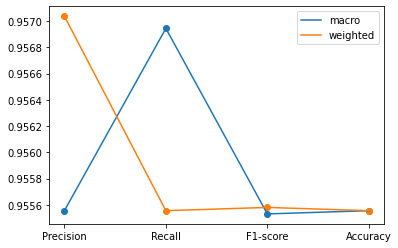

weighted 지표들 중 최댓값 :   precision_weighted = 0.95704      최솟값 :      recall_weighted = 0.95556      평균 : 0.95593 입니다.
   macro 지표들 중 최댓값 :         recall_macro = 0.95694      최솟값 :       f1_score_macro = 0.95553      평균 : 0.9559 입니다.


In [39]:
plt.plot(col_name, df_wine_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_wine_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_wine_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_wine_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_wine_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_wine_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [40]:
if (df_wine.loc[E_NAME, 'precision_weighted'] > df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] > df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] > df_wine.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_wine.loc[E_NAME, 'precision_weighted'] < df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] < df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] < df_wine.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_wine_weighted.loc[E_NAME, 'mean'] > df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_wine_weighted.loc[E_NAME, 'mean'] < df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'random_forest'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Random Forest 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [42]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_wine.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_wine_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_wine_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_wine 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_wine.loc[E_NAME, col_weighted].mean()
w_max = df_wine.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_wine.loc[E_NAME, col_weighted].max()
w_min = df_wine.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_wine.loc[E_NAME, col_weighted].min()
df_wine_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_wine.loc[E_NAME, col_macro].mean() 
m_max = df_wine.loc[E_NAME, col_macro].idxmax()
m_max_value = df_wine.loc[E_NAME, col_macro].max()
m_min = df_wine.loc[E_NAME, col_macro].idxmin()
m_min_value = df_wine.loc[E_NAME, col_macro].min()
df_wine_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

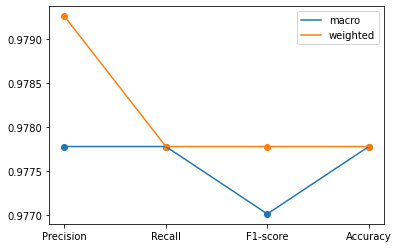

weighted 지표들 중 최댓값 :   precision_weighted = 0.97926      최솟값 :      recall_weighted = 0.97778      평균 : 0.97815 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.97778      최솟값 :       f1_score_macro = 0.97701      평균 : 0.97759 입니다.


In [43]:
plt.plot(col_name, df_wine_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_wine_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_wine_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_wine_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_wine_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_wine_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [44]:
if (df_wine.loc[E_NAME, 'precision_weighted'] > df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] > df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] > df_wine.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_wine.loc[E_NAME, 'precision_weighted'] < df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] < df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] < df_wine.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_wine_weighted.loc[E_NAME, 'mean'] > df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_wine_weighted.loc[E_NAME, 'mean'] < df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### Support Vector Machine (SVM)


In [45]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SVM'

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.50      1.00      0.67        15
           2       0.00      0.00      0.00        14

    accuracy                           0.67        45
   macro avg       0.50      0.65      0.54        45
weighted avg       0.52      0.67      0.57        45



/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [46]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_wine.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_wine_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_wine_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_wine 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_wine.loc[E_NAME, col_weighted].mean()
w_max = df_wine.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_wine.loc[E_NAME, col_weighted].max()
w_min = df_wine.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_wine.loc[E_NAME, col_weighted].min()
df_wine_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_wine.loc[E_NAME, col_macro].mean() 
m_max = df_wine.loc[E_NAME, col_macro].idxmax()
m_max_value = df_wine.loc[E_NAME, col_macro].max()
m_min = df_wine.loc[E_NAME, col_macro].idxmin()
m_min_value = df_wine.loc[E_NAME, col_macro].min()
df_wine_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

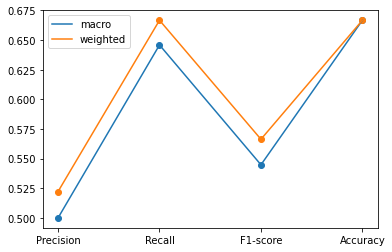

weighted 지표들 중 최댓값 :      recall_weighted = 0.66667      최솟값 :   precision_weighted = 0.52222      평균 : 0.60547 입니다.
   macro 지표들 중 최댓값 :             accuracy = 0.66667      최솟값 :      precision_macro = 0.5      평균 : 0.58933 입니다.


In [47]:
plt.plot(col_name, df_wine_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_wine_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_wine_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_wine_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_wine_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_wine_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [48]:
if (df_wine.loc[E_NAME, 'precision_weighted'] > df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] > df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] > df_wine.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_wine.loc[E_NAME, 'precision_weighted'] < df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] < df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] < df_wine.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_wine_weighted.loc[E_NAME, 'mean'] > df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_wine_weighted.loc[E_NAME, 'mean'] < df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

weighted 지표들의 값이 macro 지표들 값보다 높습니다.


##### SGD Classifier


In [49]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SGD'

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.38      1.00      0.56        15
           2       0.00      0.00      0.00        14

    accuracy                           0.47        45
   macro avg       0.46      0.46      0.37        45
weighted avg       0.48      0.47      0.38        45



/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGD 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [50]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_wine.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_wine_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_wine_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_wine 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_wine.loc[E_NAME, col_weighted].mean()
w_max = df_wine.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_wine.loc[E_NAME, col_weighted].max()
w_min = df_wine.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_wine.loc[E_NAME, col_weighted].min()
df_wine_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_wine.loc[E_NAME, col_macro].mean() 
m_max = df_wine.loc[E_NAME, col_macro].idxmax()
m_max_value = df_wine.loc[E_NAME, col_macro].max()
m_min = df_wine.loc[E_NAME, col_macro].idxmin()
m_min_value = df_wine.loc[E_NAME, col_macro].min()
df_wine_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

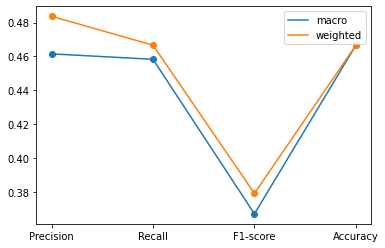

weighted 지표들 중 최댓값 :   precision_weighted = 0.48376      최솟값 :    f1_score_weighted = 0.37912      평균 : 0.44905 입니다.
   macro 지표들 중 최댓값 :             accuracy = 0.46667      최솟값 :       f1_score_macro = 0.367      평균 : 0.43839 입니다.


In [51]:
plt.plot(col_name, df_wine_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_wine_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_wine_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_wine_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_wine_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_wine_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [52]:
if (df_wine.loc[E_NAME, 'precision_weighted'] > df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] > df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] > df_wine.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_wine.loc[E_NAME, 'precision_weighted'] < df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] < df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] < df_wine.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_wine_weighted.loc[E_NAME, 'mean'] > df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_wine_weighted.loc[E_NAME, 'mean'] < df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

weighted 지표들의 값이 macro 지표들 값보다 높습니다.


##### Logistic Regression


In [53]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 10**4)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'logistic_regression'

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      0.93      0.93        15
           2       0.93      1.00      0.97        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Logistic Regression 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [54]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_wine.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_wine_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_wine_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_wine 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_wine.loc[E_NAME, col_weighted].mean()
w_max = df_wine.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_wine.loc[E_NAME, col_weighted].max()
w_min = df_wine.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_wine.loc[E_NAME, col_weighted].min()
df_wine_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_wine.loc[E_NAME, col_macro].mean() 
m_max = df_wine.loc[E_NAME, col_macro].idxmax()
m_max_value = df_wine.loc[E_NAME, col_macro].max()
m_min = df_wine.loc[E_NAME, col_macro].idxmin()
m_min_value = df_wine.loc[E_NAME, col_macro].min()
df_wine_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

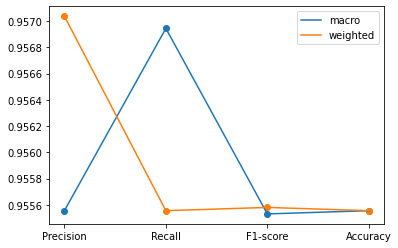

weighted 지표들 중 최댓값 :   precision_weighted = 0.95704      최솟값 :      recall_weighted = 0.95556      평균 : 0.95593 입니다.
   macro 지표들 중 최댓값 :         recall_macro = 0.95694      최솟값 :       f1_score_macro = 0.95553      평균 : 0.9559 입니다.


In [55]:
plt.plot(col_name, df_wine_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_wine_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_wine_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_wine_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_wine_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_wine_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_wine_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_wine_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_wine_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_wine_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [56]:
if (df_wine.loc[E_NAME, 'precision_weighted'] > df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] > df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] > df_wine.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_wine.loc[E_NAME, 'precision_weighted'] < df_wine.loc[E_NAME, 'precision_macro']) \
    and (df_wine.loc[E_NAME, 'recall_weighted'] < df_wine.loc[E_NAME, 'recall_macro'])\
    and (df_wine.loc[E_NAME, 'f1_score_weighted'] < df_wine.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_wine_weighted.loc[E_NAME, 'mean'] > df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_wine_weighted.loc[E_NAME, 'mean'] < df_wine_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


#### (6) 모델들의 성능 평가

여기까지 5개의 모델들을 wine data로 실험해보았습니다.  
모델들이 가지는 지표값들이 포함되어있는 데이터 프레임들을 나타내보겠습니다.

In [57]:
df_wine

,precision_weighted,precision_macro,recall_weighted,recall_macro,f1_score_weighted,f1_score_macro,accuracy
decision_tree,0.957037,0.955556,0.955556,0.956944,0.955580,0.955531,0.955556
random_forest,0.979259,0.977778,0.977778,0.977778,0.977778,0.977011,0.977778
SVM,0.522222,0.500000,0.666667,0.645833,0.566308,0.544803,0.666667
SGD,0.483761,0.461538,0.466667,0.458333,0.379125,0.367003,0.466667
logistic_regression,0.957037,0.955556,0.955556,0.956944,0.955580,0.955531,0.955556


In [58]:
df_wine_weighted

,precision_weighted,recall_weighted,f1_score_weighted,accuracy,max,max_value,min,min_value,mean
decision_tree,0.957037,0.955556,0.955580,0.955556,precision_weighted,0.957037,recall_weighted,0.955556,0.955932
random_forest,0.979259,0.977778,0.977778,0.977778,precision_weighted,0.979259,recall_weighted,0.977778,0.978148
SVM,0.522222,0.666667,0.566308,0.666667,recall_weighted,0.666667,precision_weighted,0.522222,0.605466
SGD,0.483761,0.466667,0.379125,0.466667,precision_weighted,0.483761,f1_score_weighted,0.379125,0.449055
logistic_regression,0.957037,0.955556,0.955580,0.955556,precision_weighted,0.957037,recall_weighted,0.955556,0.955932


In [59]:
df_wine_macro

,precision_macro,recall_macro,f1_score_macro,accuracy,max,max_value,min,min_value,mean
decision_tree,0.955556,0.956944,0.955531,0.955556,recall_macro,0.956944,f1_score_macro,0.955531,0.955897
random_forest,0.977778,0.977778,0.977011,0.977778,precision_macro,0.977778,f1_score_macro,0.977011,0.977586
SVM,0.500000,0.645833,0.544803,0.666667,accuracy,0.666667,precision_macro,0.500000,0.589326
SGD,0.461538,0.458333,0.367003,0.466667,accuracy,0.466667,f1_score_macro,0.367003,0.438385
logistic_regression,0.955556,0.956944,0.955531,0.955556,recall_macro,0.956944,f1_score_macro,0.955531,0.955897


* 가장 성능이 좋은 모델을 찾아봅시다.  
먼저 위의 DF만 보고는 어떤 지표를 가지고 비교할지 잘 모르겠으니 각 지표별로 최대값을 가지는 모델들을 출력해봅시다.

In [60]:
print(df_wine.idxmax())

precision_weighted    random_forest
precision_macro       random_forest
recall_weighted       random_forest
recall_macro          random_forest
f1_score_weighted     random_forest
f1_score_macro        random_forest
accuracy              random_forest
dtype: object


모든 지표에서 Random Forest 모델이 가장 높은 값을 가집니다. 이렇게 보면 어떤 지표를 선택하더라도 Random Forest 가 가장 높은 값을 가지므로  
wine classification에서는 5개의 모델 중 Random Forest 모델이 성능이 가장 좋은 것으로 나옵니다.

* 그럼 해당 데이터에서 모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
  
이 데이터 또한 support 값이 다르므로 weighted 지표들이 macro 지표들 보다 더 의미있다고 봅니다.  
그리고 accuray 또한 unbalanced 데이터에서 모델 성능을 잘 평가하지 못할 수 있습니다.  
그래서 precision_weighted, recall_weighted, f1_score_weighted 중에서 고를 것 같습니다.  
  
이제 데이터의 용도 및 내용을 고려하는데, 우리는 와인 데이터를 사용하였습니다.  
만약 생산된 와인에서 A 와인만 골라야하고 다른 와인이 있으면 안될 때면 Estimator 가 다른 와인을  
A 와인으로 예측하는게 가장 문제가 되기 때문에 이와 관련 된 모델이 True라고 할 때 실제 값이 True인지  
확인하는 precision 이 더 중요한 지표이므로 precision_weighted 이 가장 중요한 지표입니다.  
하지만 따로 정해진 조건이 없다면 둘의 조화평균인 f1_score_weighted를 해당 데이터에 가장 무난한 지표라고 봅니다.

### 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

#### (1) 필요한 모듈 import 하기

- <span style = "color: #0000FF">sklearn dataset로 부터 breast_cancer data를 가져온다.</span>
- <span style = "color: #0000FF">train data와 test data를 나눠주는 train_test_split 함수를 가져온다.</span>
- <span style = "color: #0000FF">분류 보고서를 작성해주는 classification_report를 가져온다.</span>

In [61]:
from sklearn.datasets import load_breast_cancer
# 나머지 모듈은 위 프로젝트 에서 이미 import 하였습니다.

#### (2) 데이터 준비

- <span style = "color: #0000FF">load_breast_cancer()을 사용해 와인 데이터를 breast_cancer 변수에 넣습니다.</span>
- breast_cancer 변수가 어떤 변수와 메서드를 가지고 있는지 나열합니다.
- breast_cancer 의 정보를 출력합니다.

In [62]:
breast_cancer = load_breast_cancer()
print(dir(breast_cancer))
print(breast_cancer.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### (3) 데이터 이해하기

- <span style = "color: #0000FF">Feature Data 지정하기</span>
  - breast_cancer의 breast_cancer(feature)를 wine_data에 넣기
  - breast_cancer_data의 형태 : 569행, 30열
  - radius, texture, perimeter, area 등의 30개의 특징 (numeric 값) 569개
- <span style = "color: #0000FF">Label(target) Data 지정하기</span>
  - breast_cancer의 label을 breast_cancer_label에 넣기
  - DataFrame에 feature data 넣기
  - target을 통해 Dataframe에 label column 생성
- <span style = "color: #0000FF">Target Names 출력해 보기</span>
  - 악성 종양과 양성 종양
- <span style = "color: #0000FF">데이터 Describe 해 보기</span>

In [63]:
# print(breast_cancer.feature_names)
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)
print(breast_cancer_data[0])
breast_cancer_label = breast_cancer.target
breast_cancer_df = pd.DataFrame(data = breast_cancer_data, columns = breast_cancer.feature_names)
# print(breast_cancer_df)
breast_cancer_df["label"] = breast_cancer_label
# print(breast_cancer_df)
print(breast_cancer.target_names)

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['malignant' 'benign']


In [64]:
# wine Describe 해보기
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### (4) train, test 데이터 분리

- breast_cancer_data와 breast_cancer_label을 가지고 분리
- 25%를 test 데이터로 사용

In [65]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size=0.25, random_state=42)

#### (5) 다양한 모델로 학습시켜보기

- <span style = "color: #0000FF">Decision Tree 사용해 보기</span>
- <span style = "color: #0000FF">Random Forest 사용해 보기</span>
- <span style = "color: #0000FF">SVM 사용해 보기</span>
- <span style = "color: #0000FF">SGD Classifier 사용해 보기</span>
- <span style = "color: #0000FF">Logistic Regression 사용해 보기</span>

학습시키기 전에 앞서 추후 분석을 용이하게 하기 위해 Estimator 별로 데이터를 가지는 DataFrame을 만들겠습니다.

In [66]:
df_breast_cancer = pd.DataFrame(myArr, columns = metricsName, index = estimatorName)
df_breast_cancer_weighted = df_breast_cancer.loc[ :, [ ('weighted' in i or i == 'accuracy') for i in df_breast_cancer.columns]].copy()
df_breast_cancer_macro = df_breast_cancer.loc[ :, [ ('macro' in i or i == 'accuracy') for i in df_breast_cancer.columns]].copy()
df_breast_cancer_weighted.loc[:,col_name2] = [0, 0, 0, 0, 0]
df_breast_cancer_macro.loc[:,col_name2] = [0, 0, 0, 0, 0]

##### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred))

E_NAME = 'decision_tree'

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Decision_tree 를 사용하여 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.  
전체에 대한 precision, recall, f1-score 값을 나타낼 수 있는 각각의 macro avg와 weighted avg 또한 나왔습니다.

In [68]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_breast_cancer.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_breast_cancer_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_breast_cancer_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_breast_cancer 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_breast_cancer.loc[E_NAME, col_weighted].mean()
w_max = df_breast_cancer.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_breast_cancer.loc[E_NAME, col_weighted].max()
w_min = df_breast_cancer.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_breast_cancer.loc[E_NAME, col_weighted].min()
df_breast_cancer_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_breast_cancer.loc[E_NAME, col_macro].mean() 
m_max = df_breast_cancer.loc[E_NAME, col_macro].idxmax()
m_max_value = df_breast_cancer.loc[E_NAME, col_macro].max()
m_min = df_breast_cancer.loc[E_NAME, col_macro].idxmin()
m_min_value = df_breast_cancer.loc[E_NAME, col_macro].min()
df_breast_cancer_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

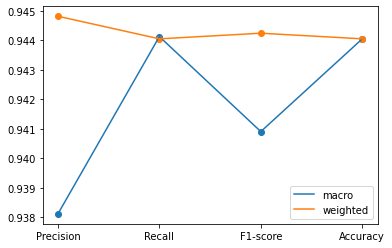

weighted 지표들 중 최댓값 :   precision_weighted = 0.94482      최솟값 :      recall_weighted = 0.94406      평균 : 0.9443 입니다.
   macro 지표들 중 최댓값 :         recall_macro = 0.94413      최솟값 :      precision_macro = 0.93812      평균 : 0.9418 입니다.


In [69]:
plt.plot(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_breast_cancer_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_breast_cancer_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [70]:
if (df_breast_cancer.loc[E_NAME, 'precision_weighted'] > df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] > df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] > df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_breast_cancer.loc[E_NAME, 'precision_weighted'] < df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] < df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] < df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_breast_cancer_weighted.loc[E_NAME, 'mean'] > df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_breast_cancer_weighted.loc[E_NAME, 'mean'] < df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'random_forest'

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Random Forest 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [72]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_breast_cancer.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_breast_cancer_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_breast_cancer_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_breast_cancer 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_breast_cancer.loc[E_NAME, col_weighted].mean()
w_max = df_breast_cancer.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_breast_cancer.loc[E_NAME, col_weighted].max()
w_min = df_breast_cancer.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_breast_cancer.loc[E_NAME, col_weighted].min()
df_breast_cancer_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_breast_cancer.loc[E_NAME, col_macro].mean() 
m_max = df_breast_cancer.loc[E_NAME, col_macro].idxmax()
m_max_value = df_breast_cancer.loc[E_NAME, col_macro].max()
m_min = df_breast_cancer.loc[E_NAME, col_macro].idxmin()
m_min_value = df_breast_cancer.loc[E_NAME, col_macro].min()
df_breast_cancer_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

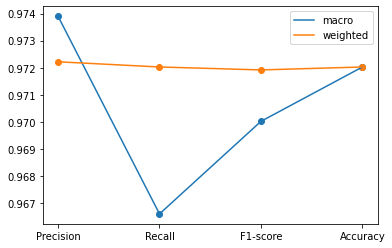

weighted 지표들 중 최댓값 :   precision_weighted = 0.97222      최솟값 :    f1_score_weighted = 0.97192      평균 : 0.97205 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.9739      최솟값 :         recall_macro = 0.9666      평균 : 0.97064 입니다.


In [73]:
plt.plot(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_breast_cancer_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_breast_cancer_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [74]:
if (df_breast_cancer.loc[E_NAME, 'precision_weighted'] > df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] > df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] > df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_breast_cancer.loc[E_NAME, 'precision_weighted'] < df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] < df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] < df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_breast_cancer_weighted.loc[E_NAME, 'mean'] > df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_breast_cancer_weighted.loc[E_NAME, 'mean'] < df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### Support Vector Machine (SVM)


In [75]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SVM'

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



SVM 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [76]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_breast_cancer.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_breast_cancer_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_breast_cancer_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_breast_cancer 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_breast_cancer.loc[E_NAME, col_weighted].mean()
w_max = df_breast_cancer.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_breast_cancer.loc[E_NAME, col_weighted].max()
w_min = df_breast_cancer.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_breast_cancer.loc[E_NAME, col_weighted].min()
df_breast_cancer_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_breast_cancer.loc[E_NAME, col_macro].mean() 
m_max = df_breast_cancer.loc[E_NAME, col_macro].idxmax()
m_max_value = df_breast_cancer.loc[E_NAME, col_macro].max()
m_min = df_breast_cancer.loc[E_NAME, col_macro].idxmin()
m_min_value = df_breast_cancer.loc[E_NAME, col_macro].min()
df_breast_cancer_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

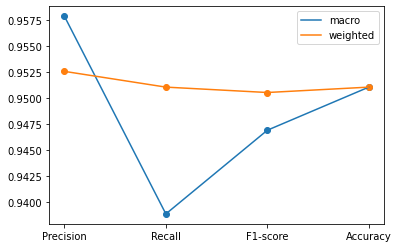

weighted 지표들 중 최댓값 :   precision_weighted = 0.95257      최솟값 :    f1_score_weighted = 0.95053      평균 : 0.9513 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.95788      최솟값 :         recall_macro = 0.93883      평균 : 0.94866 입니다.


In [77]:
plt.plot(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_breast_cancer_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_breast_cancer_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [78]:
if (df_breast_cancer.loc[E_NAME, 'precision_weighted'] > df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] > df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] > df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_breast_cancer.loc[E_NAME, 'precision_weighted'] < df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] < df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] < df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_breast_cancer_weighted.loc[E_NAME, 'mean'] > df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_breast_cancer_weighted.loc[E_NAME, 'mean'] < df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.


##### SGD Classifier


In [79]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'SGD'

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        54
           1       1.00      0.33      0.49        89

    accuracy                           0.58       143
   macro avg       0.74      0.66      0.57       143
weighted avg       0.80      0.58      0.55       143



SGD 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [80]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_breast_cancer.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_breast_cancer_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_breast_cancer_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_breast_cancer 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_breast_cancer.loc[E_NAME, col_weighted].mean()
w_max = df_breast_cancer.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_breast_cancer.loc[E_NAME, col_weighted].max()
w_min = df_breast_cancer.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_breast_cancer.loc[E_NAME, col_weighted].min()
df_breast_cancer_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_breast_cancer.loc[E_NAME, col_macro].mean() 
m_max = df_breast_cancer.loc[E_NAME, col_macro].idxmax()
m_max_value = df_breast_cancer.loc[E_NAME, col_macro].max()
m_min = df_breast_cancer.loc[E_NAME, col_macro].idxmin()
m_min_value = df_breast_cancer.loc[E_NAME, col_macro].min()
df_breast_cancer_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

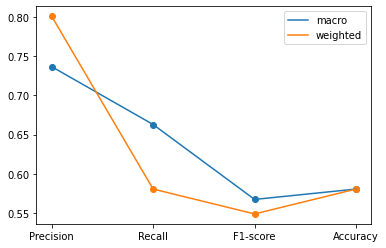

weighted 지표들 중 최댓값 :   precision_weighted = 0.80125      최솟값 :    f1_score_weighted = 0.54867      평균 : 0.62769 입니다.
   macro 지표들 중 최댓값 :      precision_macro = 0.73684      최솟값 :       f1_score_macro = 0.56719      평균 : 0.63684 입니다.


In [81]:
plt.plot(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_breast_cancer_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_breast_cancer_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [82]:
if (df_breast_cancer.loc[E_NAME, 'precision_weighted'] > df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] > df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] > df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_breast_cancer.loc[E_NAME, 'precision_weighted'] < df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] < df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] < df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_breast_cancer_weighted.loc[E_NAME, 'mean'] > df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_breast_cancer_weighted.loc[E_NAME, 'mean'] < df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

지표들이 다양하게 나옵니다.
단, 지표들의 평균 값은 macro 지표들이 더 높습니다.


##### Logistic Regression


In [83]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 10**4)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test,y_pred))

E_NAME = 'logistic_regression'

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Logistic Regression 또한 각 라벨마다 precision, recall과 f1-score과 나왔고 전체에 대한 accuracy가 나왔습니다.

In [84]:
# 각 지표값을 구해서 df, df_weighted, df_macro에 넣습니다.
pre_w = precision_score(y_test, y_pred, average = 'weighted')
pre_m = precision_score(y_test, y_pred, average = 'macro')
rec_w = recall_score(y_test, y_pred, average = 'weighted')
rec_m = recall_score(y_test, y_pred, average = 'macro')
f1_w = f1_score(y_test, y_pred, average = 'weighted')
f1_m = f1_score(y_test, y_pred, average = 'macro')
acc = accuracy_score(y_test, y_pred)
df_breast_cancer.loc[E_NAME] = [pre_w,pre_m,rec_w,rec_m,f1_w,f1_m,acc]
df_breast_cancer_weighted.loc[E_NAME, col_weighted] = [pre_w, rec_w, f1_w, acc]
df_breast_cancer_macro.loc[E_NAME, col_macro] = [pre_m, rec_m, f1_m, acc]

# weighted 와 macro에 따라 최댓값, 최댓값 이름, 최솟값, 최솟값 이름, 평균을 기존의 df_breast_cancer 에서 구하고 각각 df에 추가합니다.
# 처음에 weight에서 비교하려고 했으나 문자열이 포함되어있어 idxmax에서 오류가 발생했었습니다.
w_mean = df_breast_cancer.loc[E_NAME, col_weighted].mean()
w_max = df_breast_cancer.loc[E_NAME, col_weighted].idxmax()
w_max_value = df_breast_cancer.loc[E_NAME, col_weighted].max()
w_min = df_breast_cancer.loc[E_NAME, col_weighted].idxmin()
w_min_value = df_breast_cancer.loc[E_NAME, col_weighted].min()
df_breast_cancer_weighted.loc[E_NAME,col_name2] = [w_max, w_max_value, w_min, w_min_value, w_mean]

m_mean = df_breast_cancer.loc[E_NAME, col_macro].mean() 
m_max = df_breast_cancer.loc[E_NAME, col_macro].idxmax()
m_max_value = df_breast_cancer.loc[E_NAME, col_macro].max()
m_min = df_breast_cancer.loc[E_NAME, col_macro].idxmin()
m_min_value = df_breast_cancer.loc[E_NAME, col_macro].min()
df_breast_cancer_macro.loc[E_NAME,col_name2] = [m_max, m_max_value, m_min, m_min_value, m_mean]

각 지표값과 weighted 와 macro 지표값들의 최댓값, 최솟값, 평균을 구합니다.

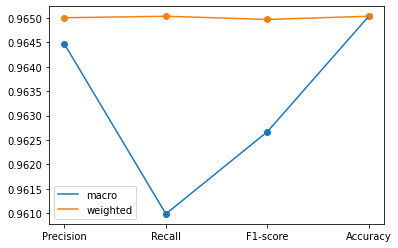

weighted 지표들 중 최댓값 :      recall_weighted = 0.96503      최솟값 :    f1_score_weighted = 0.96497      평균 : 0.96501 입니다.
   macro 지표들 중 최댓값 :             accuracy = 0.96503      최솟값 :         recall_macro = 0.96099      평균 : 0.96329 입니다.


In [85]:
plt.plot(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro], label = "macro")
plt.scatter(col_name, df_breast_cancer_macro.loc[E_NAME, col_macro])
plt.plot(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted], label = "weighted")
plt.scatter(col_name, df_breast_cancer_weighted.loc[E_NAME, col_weighted])
plt.legend()
plt.show()

print("weighted 지표들 중 최댓값 :", df_breast_cancer_weighted.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_weighted.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_weighted.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_weighted.loc[E_NAME, "mean"], 5), "입니다.")
print("   macro 지표들 중 최댓값 :", df_breast_cancer_macro.loc[E_NAME, "max"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME,"max_value"],5),\
      "     최솟값 :", df_breast_cancer_macro.loc[E_NAME, "min"].rjust(20),"=", round(df_breast_cancer_macro.loc[E_NAME, "min_value"], 5),\
      "     평균 :", round(df_breast_cancer_macro.loc[E_NAME, "mean"], 5), "입니다.")

In [86]:
if (df_breast_cancer.loc[E_NAME, 'precision_weighted'] > df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] > df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] > df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("weighted 지표들의 값이 macro 지표들 값보다 높습니다.")
elif (df_breast_cancer.loc[E_NAME, 'precision_weighted'] < df_breast_cancer.loc[E_NAME, 'precision_macro']) \
    and (df_breast_cancer.loc[E_NAME, 'recall_weighted'] < df_breast_cancer.loc[E_NAME, 'recall_macro'])\
    and (df_breast_cancer.loc[E_NAME, 'f1_score_weighted'] < df_breast_cancer.loc[E_NAME, 'f1_score_macro']):
        print("macro 지표들의 값이 weighted 지표들 값보다 높습니다.")
else:
    print("지표들이 다양하게 나옵니다.")
    if df_breast_cancer_weighted.loc[E_NAME, 'mean'] > df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 weighted 지표들이 더 높습니다.")
    elif df_breast_cancer_weighted.loc[E_NAME, 'mean'] < df_breast_cancer_macro.loc[E_NAME, 'mean']:
        print("단, 지표들의 평균 값은 macro 지표들이 더 높습니다.")
    else:
        print("그런데 두 지표들의 평균은 같습니다.")

weighted 지표들의 값이 macro 지표들 값보다 높습니다.


#### (6) 모델들의 성능 평가

여기까지 5개의 모델들을 breast_cancer data로 실험해보았습니다.  
모델들이 가지는 지표값들이 포함되어있는 데이터 프레임들을 나타내보겠습니다.

In [87]:
df_breast_cancer

,precision_weighted,precision_macro,recall_weighted,recall_macro,f1_score_weighted,f1_score_macro,accuracy
decision_tree,0.944822,0.938116,0.944056,0.944132,0.944247,0.940909,0.944056
random_forest,0.972220,0.973901,0.972028,0.966604,0.971919,0.970021,0.972028
SVM,0.952567,0.957881,0.951049,0.938826,0.950530,0.946894,0.951049
SGD,0.801251,0.736842,0.580420,0.662921,0.548672,0.567191,0.580420
logistic_regression,0.965004,0.964465,0.965035,0.960986,0.964969,0.962669,0.965035


In [88]:
df_breast_cancer_weighted

,precision_weighted,recall_weighted,f1_score_weighted,accuracy,max,max_value,min,min_value,mean
decision_tree,0.944822,0.944056,0.944247,0.944056,precision_weighted,0.944822,recall_weighted,0.944056,0.944295
random_forest,0.972220,0.972028,0.971919,0.972028,precision_weighted,0.972220,f1_score_weighted,0.971919,0.972049
SVM,0.952567,0.951049,0.950530,0.951049,precision_weighted,0.952567,f1_score_weighted,0.950530,0.951299
SGD,0.801251,0.580420,0.548672,0.580420,precision_weighted,0.801251,f1_score_weighted,0.548672,0.627691
logistic_regression,0.965004,0.965035,0.964969,0.965035,recall_weighted,0.965035,f1_score_weighted,0.964969,0.965011


In [89]:
df_breast_cancer_macro

,precision_macro,recall_macro,f1_score_macro,accuracy,max,max_value,min,min_value,mean
decision_tree,0.938116,0.944132,0.940909,0.944056,recall_macro,0.944132,precision_macro,0.938116,0.941803
random_forest,0.973901,0.966604,0.970021,0.972028,precision_macro,0.973901,recall_macro,0.966604,0.970639
SVM,0.957881,0.938826,0.946894,0.951049,precision_macro,0.957881,recall_macro,0.938826,0.948663
SGD,0.736842,0.662921,0.567191,0.580420,precision_macro,0.736842,f1_score_macro,0.567191,0.636844
logistic_regression,0.964465,0.960986,0.962669,0.965035,accuracy,0.965035,recall_macro,0.960986,0.963289


* 가장 성능이 좋은 모델을 찾아봅시다.  
먼저 위의 DF만 보고는 어떤 지표를 가지고 비교할지 잘 모르겠으니 각 지표별로 최대값을 가지는 모델들을 출력해봅시다.

In [90]:
print(df_breast_cancer.idxmax())

precision_weighted    random_forest
precision_macro       random_forest
recall_weighted       random_forest
recall_macro          random_forest
f1_score_weighted     random_forest
f1_score_macro        random_forest
accuracy              random_forest
dtype: object


모든 지표에서 Random Forest 모델이 가장 높은 값을 가집니다. 이렇게 보면 어떤 지표를 선택하더라도 Random Forest 가 가장 높은 값을 가지므로  
breast_cancer classification에서는 5개의 모델 중 Random Forest 모델이 성능이 가장 좋은 것으로 나옵니다.

* 그럼 해당 데이터에서 모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
  
이 데이터 또한 2개의 클래스의 샘플 개수가 다르므로 weighted 지표들이 macro 지표들 보다 더 의미있다고 봅니다.  
그리고 accuray 또한 unbalanced 데이터에서 모델 성능을 잘 평가하지 못할 수 있습니다.  
그래서 precision_weighted, recall_weighted, f1_score_weighted 중에서 고를 것 같습니다.  
  
이제 데이터의 용도 및 내용을 고려하는데, 우리는 breast_cancer 데이터를 사용하였습니다.  
용도가 모호했던 전의 프로젝트들과는 다르게 요번에는 확실한 목적이 있습이다.  
바로, 종양을 보고 악성인지(양성인지) 확인하는 검사입니다.  
여기서 제일 중요한 점은 모델이 양성을 악성으로 본다고 해도 다시 치료를 하면 되지만  
악성을 양성으로 잘못 예측 한 경우 암을 놓치게 되는 매우 큰 문제가 발생합니다.  
그리하여 제일 중요한 지표는 실제 값이 들어왔을때 모델이 제대로 예측하냐는 것 입니다.  
이와 관련된 지표는 recall 이므로 해당 데이터에서 가장 중요한 지표는 recall_weighted 입니다.

### 회고

* 이번 프로젝트에서 어려웠던 점
    - pandas의 DataFrame을 활용하여 정리 및 분석하면서 이를 부분 카피하거나 값을 바꾸는 것에  
      아직 미숙하여 시간이 꽤 소모되었습니다.
* 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
  * 알게 된점
    - classification report에 나와있는 average 종류인 macro 와 weighted 추가로 micro 까지 알게되었습니다.
    - 왜 f-score가 조화평균을 쓰는지 알게되었습니다.
    - 여러 지표들을 반환하는 함수들과 그 함수들의 인자 사용법을 알게되었습니다.
    - DataFrame을 복사하거나 값을 바꾸는 방법들에 대해 알게되었습니다.
  * 아직 모호한 점
    - DataFrame의 idxmax를 string이 존재하는 DF에서 숫자만 포함하는 특정 colmn 만 지정해도 error가 나와서
      이게 copy 문제인지 아니면 idxmax 함수 자체 문제인지 완전히 파악 못했습니다.
* 루브릭 평가를 맞추기 위해 시도한 점
    - weighted 지표와 macro 지표를 모아서 DataFrame 으로 정리하여 각각의 지표들에서 최댓값, 최솟값,
      평균을 구해보았으며 그래프를 그려 어떤 지표가 대체로 더 높은 값을 가지는지 쉽게 알 수 있었습니다.